# Spatial Variability in Surface Temperature

## Snoqualmie
Snoqualmie has two $T_s$ sensors, pointed at different patches of snow.
Questions:
    - How much does $T_s$ vary between the two sensors?
    - Are there particular conditions that co-occurr with spatial variability in $T_s$? 

In [1]:
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import xarray as xr
import kray
# OS interaction
import sys, pickle, os
# import subplots function for plotting
import seaborn as sns
import matplotlib
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import kgraph
import matplotlib.gridspec as gridspec


# --------------------------------------------------------------------------------------------
# Directory Lists
# Unix
if 'linux' in sys.platform:
    dirPre = '/home/lapok/gdrive/'
# Mac
elif 'darwin' in sys.platform:
    dirPre = '/Users/karllapo/gdrive/'
# Project directory
dirProj = dirPre + 'SnowHydrology/proj/TurbulenceFeedbacks/'
# Directory for printing figures
dirPrint = dirPre + 'SnowHydrology/proj/TurbulenceFeedbacks/Graphics'
# Processed data directory
dirData = dirPre + 'SnowHydrology/proj/TurbulenceFeedbacks/data/SNQ'

# --------------------------------------------------------------------------------------------
# Global formatting
sns.set_context('poster')
sns.set_style('whitegrid')
# must insert this statement to render the plots within the notebook
%matplotlib inline

In [2]:
## Read the formatted supporting snoqualmie obs
os.chdir(dirData)
support = xr.open_dataset('SnoqualmieObs.SupportData.wy2013_wy2015.nc')

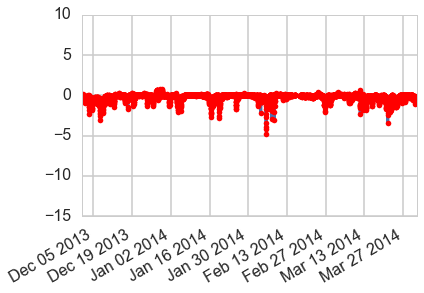

In [29]:
fig, ax = plt.subplots(1, 1)
ax.plot(support.time, support.Tsrf_1-support.Tsrf_2)
ax.plot(support.where(support.SP==1).time, (support.Tsrf_1-support.Tsrf_2).where(support.SP==1), 'r.')
ax.set_xlim(datetime(2013,12,1), datetime(2014,4,1))
fig.autofmt_xdate()

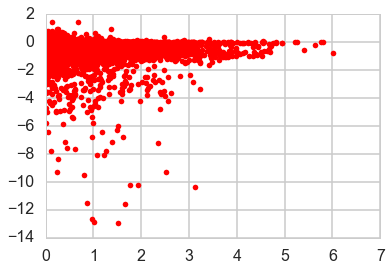

In [28]:
fig, ax = plt.subplots(1, 1)
ax.plot(support.where(support.SP==1).WIND, (support.Tsrf_1-support.Tsrf_2).where(support.SP==1), 'r.')

ValueError: max must be larger than min in range parameter.

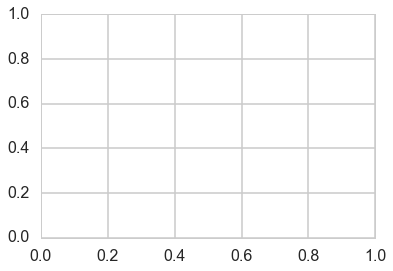

In [36]:
plt.hist((support.Tsrf_1-support.Tsrf_2).where(support.SP==1).\
         loc[dict(time=slice(datetime(2013,12,1), datetime(2014,4,1)))], )